In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


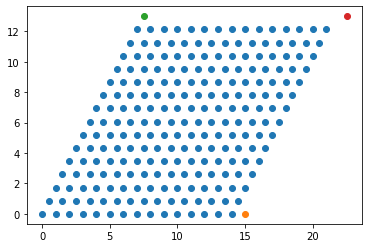

In [13]:
N=15
n1=np.arange(0,N,1)
n2=np.arange(0,N,1)
k1=np.array([1,0])
k2=np.array([1/2,np.sqrt(3)/2])
n_1,n_2=np.meshgrid(n1,n2)
G1=k1*N
G2=k2*N

XsLatt=(k1[0]*n_1+k2[0]*n_2).T
YsLatt=(k1[1]*n_1+k2[1]*n_2).T

scatter(k1[0]*n_1+k2[0]*n_2,k1[1]*n_1+k2[1]*n_2)
plt.scatter(G1[0], G1[1])
plt.scatter(G2[0], G2[1])
plt.scatter(G1[0]+G2[0], G1[1]+G2[1])


In [14]:
XsLatt=(k1[0]*n_1+k2[0]*n_2).T
YsLatt=(k1[1]*n_1+k2[1]*n_2).T



In [15]:
from scipy.spatial import Voronoi, voronoi_plot_2d
def FBZ_points(b_1,b_2):
    #creating reciprocal lattice
    Np=4
    n1=np.arange(-Np,Np+1)
    n2=np.arange(-Np,Np+1)
    Recip_lat=[]
    for i in n1:
        for j in n2:
            point=b_1*i+b_2*j
            Recip_lat.append(point)

    #getting the nearest neighbours to the gamma point
    Recip_lat_arr=np.array(Recip_lat)
    dist=np.round(np.sqrt(np.sum(Recip_lat_arr**2, axis=1)),decimals=10)
    sorted_dist=np.sort(list(set(dist)) )
    points=Recip_lat_arr[np.where(dist<sorted_dist[2])[0]]

    #getting the voronoi decomposition of the gamma point and the nearest neighbours
    vor = Voronoi(points)
    Vertices=(vor.vertices)

    #ordering the points counterclockwise in the -pi,pi range
    angles_list=list(np.arctan2(Vertices[:,1],Vertices[:,0]))
    Vertices_list=list(Vertices)

    #joint sorting the two lists for angles and vertices for convenience later.
    # the linear plot routine requires the points to be in order
    # atan2 takes into acount quadrant to get the sign of the angle
    angles_list, Vertices_list = (list(t) for t in zip(*sorted(zip(angles_list, Vertices_list))))

    ##getting the M points as the average of consecutive K- Kp points
    Edges_list=[]
    for i in range(len(Vertices_list)):
        Edges_list.append([(Vertices_list[i][0]+Vertices_list[i-1][0])/2,(Vertices_list[i][1]+Vertices_list[i-1][1])/2])

    Gamma=[0,0]
    K=Vertices_list[0::2]
    Kp=Vertices_list[1::2]
    M=Edges_list[0::2]
    Mp=Edges_list[1::2]

    return Vertices_list, Gamma, K, Kp, M, Mp

Vertices_list, Gamma, K, Kp, M, Mp=FBZ_points(G1,G2)

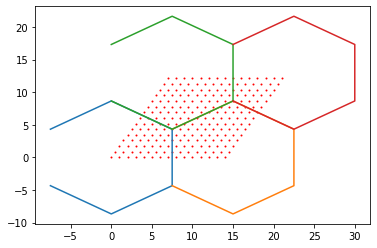

In [16]:
scatter(XsLatt,YsLatt, s=1, c='r')
VL=np.array(Vertices_list)
plot(VL[:,0],VL[:,1])
VL2=np.array(VL)
VL2[:,0]=VL[:,0]+G1[0]
VL2[:,1]=VL[:,1]+G1[1]
Vertices_list2=list(VL2)
plot(VL2[:,0],VL2[:,1])
VL3=np.array(VL)
VL3[:,0]=VL[:,0]+G2[0]
VL3[:,1]=VL[:,1]+G2[1]
Vertices_list3=list(VL3)
plot(VL3[:,0],VL3[:,1])
VL4=np.array(VL)
VL4[:,0]=VL[:,0]+G2[0]+G1[0]
VL4[:,1]=VL[:,1]+G2[1]+G1[1]
Vertices_list4=list(VL4)
plot(VL4[:,0],VL4[:,1])

In [17]:
def is_within_polygon(polygon, point):
    A = []
    B = []
    C = []  
    for i in range(len(polygon)):
        p1 = polygon[i]
        p2 = polygon[(i + 1) % len(polygon)]

        # calculate A, B and C
        a = -(p2[1] - p1[1])
        b = p2[0] - p1[0]
        c = -(a * p1[0] + b * p1[1])
        
        A.append(a)
        B.append(b)
        C.append(c)

    D = []
    for i in range(len(A)):
        d = A[i] * point[0] + B[i] * point[1] + C[i]
        D.append(d)

    t1 = np.all([d >= 0 for d in D])
    t2 = np.all([d <= 0 for d in D])
    x=t1 or t2
    return x

def is_within_polygon_no_edge(polygon, point):
    A = []
    B = []
    C = []  
    for i in range(len(polygon)):
        p1 = polygon[i]
        p2 = polygon[(i + 1) % len(polygon)]
        
        
        # calculate A, B and C
        a = -(p2[1] - p1[1])
        b = p2[0] - p1[0]
        c = -(a * p1[0] + b * p1[1])
        
        A.append(a)
        B.append(b)
        C.append(c)

    D = []
    for i in range(len(A)):
        d = A[i] * point[0] + B[i] * point[1] + C[i]
        D.append(d)
        
    t1 = np.all([d > 0 for d in D])
    t2 = np.all([d < 0 for d in D])
    x=t1 or t2
    return x

In [7]:
is_within_polygon(Vertices_list, [10,0])

False

In [8]:
XsLatt=(k1[0]*n_1+k2[0]*n_2).T
YsLatt=(k1[1]*n_1+k2[1]*n_2).T

for l in range(N*N):
    i=int(l%N)
    j=int((l-i)/N)
    if is_within_polygon(Vertices_list, [XsLatt[i,j],YsLatt[i,j]]):
        XsLatt[i,j]=XsLatt[i,j]
        YsLatt[i,j]=YsLatt[i,j]
    elif is_within_polygon(Vertices_list2, [XsLatt[i,j],YsLatt[i,j]]):
        XsLatt[i,j]=XsLatt[i,j]-G1[0]
        YsLatt[i,j]=YsLatt[i,j]-G1[1]
    elif is_within_polygon(Vertices_list3, [XsLatt[i,j],YsLatt[i,j]]):
        XsLatt[i,j]=XsLatt[i,j]-G2[0]
        YsLatt[i,j]=YsLatt[i,j]-G2[1]
    elif is_within_polygon(Vertices_list4, [XsLatt[i,j],YsLatt[i,j]]):
        XsLatt[i,j]=XsLatt[i,j]-G2[0]-G1[0]
        YsLatt[i,j]=YsLatt[i,j]-G2[1]-G1[1]
    else:
        XsLatt[i,j]=XsLatt[i,j]-G1[0]
        YsLatt[i,j]=YsLatt[i,j]-G1[1]




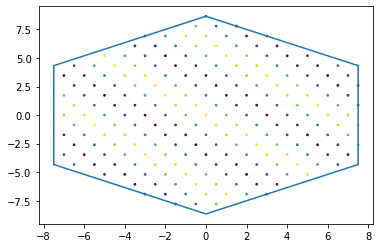

In [9]:
VV=np.array(Vertices_list+[Vertices_list[0]])
plot(VV[:,0],VV[:,1])
scatter(XsLatt,YsLatt, s=3, c=np.cos(XsLatt+YsLatt))

[[2. 1.]
 [2. 5.]]


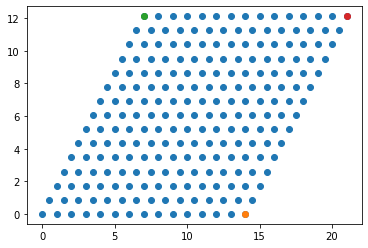

In [10]:
points=[[0,0],[3,3],[4,4],[1,3]]
vor = Voronoi(points)
print((vor.vertices))

N=15
n1=np.arange(0,N,1)
n2=np.arange(0,N,1)
k1=np.array([1,0])
k2=np.array([1/2,np.sqrt(3)/2])
n_1,n_2=np.meshgrid(n1,n2)
G1=k1*(N-1)
G2=k2*(N-1)

scatter(k1[0]*n_1+k2[0]*n_2,k1[1]*n_1+k2[1]*n_2)
plt.scatter(G1[0], G1[1])
plt.scatter(G2[0], G2[1])
plt.scatter(G1[0]+G2[0], G1[1]+G2[1])




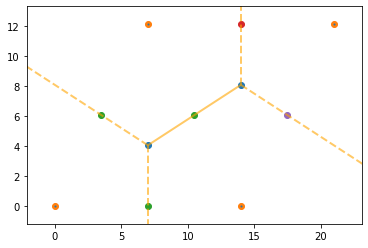

[[ 7.          4.04145188]
 [14.          8.08290377]]


In [11]:
points=[[0,0],G1,G2,G1+G2]

vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=2, line_alpha=0.6, point_size=2)




scatter(np.array(vor.vertices)[:,0],np.array(vor.vertices)[:,1])
scatter(np.array(points)[:,0],np.array(points)[:,1])
scatter(np.array(points)[1:,0]/2,np.array(points)[1:,1]/2 )
scatter(np.array(points)[2,0]+np.array(points)[1,0]/2,np.array(points)[2,1]+np.array(points)[1,1]/2)
scatter(np.array(points)[1,0]+np.array(points)[2,0]/2,np.array(points)[1,1]+np.array(points)[2,1]/2)
plt.show()



print((vor.vertices))

[[ 7.          4.04145188]
 [14.          8.08290377]]


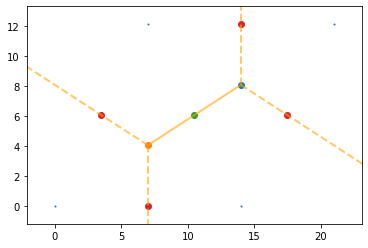

In [61]:
Gamma=[[0,0],G1,G2,G1+G2]

vor = Voronoi(Gamma)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=2, line_alpha=0.6, point_size=2)

K=np.array(vor.vertices)[1,:]
Kprime=np.array(vor.vertices)[0,:]
M=np.array(points)[3,:]/2
Mprime_li=[]
Mprime_li.append(np.array(points)[1,:]/2)
Mprime_li.append(np.array(points)[2,:]/2)
Mprime_li.append(np.array(points)[2,:]+np.array(points)[1,:]/2)
Mprime_li.append(np.array(points)[1,:]+np.array(points)[2,:]/2)
Mprime=np.array(Mprime_li)

scatter(K[0],K[1])
scatter(Kprime[0],Kprime[1])
scatter(M[0],M[1])
scatter(Kprime[:,0],Mprime[:,1])

print((vor.vertices))